<a href="https://colab.research.google.com/github/robbi621/pembelajaran-mesin/blob/main/Klasifikasi_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #buat loot drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/flower_color_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/flower_color_images'

test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')

test_flowers_dir = os.path.join(test_dir, 'flowers')
test_flower_images_dir = os.path.join(test_dir, 'flower_images')

train_flowers_dir = os.path.join(train_dir, 'flowers')
train_flower_images_dir = os.path.join(train_dir, 'flower_images')

In [ ]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(test_flowers_dir)[:5])
print(os.listdir(test_flower_images_dir)[:5])

['05_007.png', '11_010.png', '05_032.png', '04_001.png', '17_009.png']
['0050.png', '0181.png', '0007.png', '0054.png', '0202.png']


In [ ]:
# Cek jumlah data train dan data validation
print('total test flowers images:', len(os.listdir(test_flowers_dir)))
print('total test flower_images images:', len(os.listdir(test_flower_images_dir)))
print('total training flowers images:', len(os.listdir(train_flowers_dir)))
print('total training flower_images images:', len(os.listdir(train_flower_images_dir)))

total test flowers images: 603
total test flower_images images: 211
total training flowers images: 603
total training flower_images images: 211


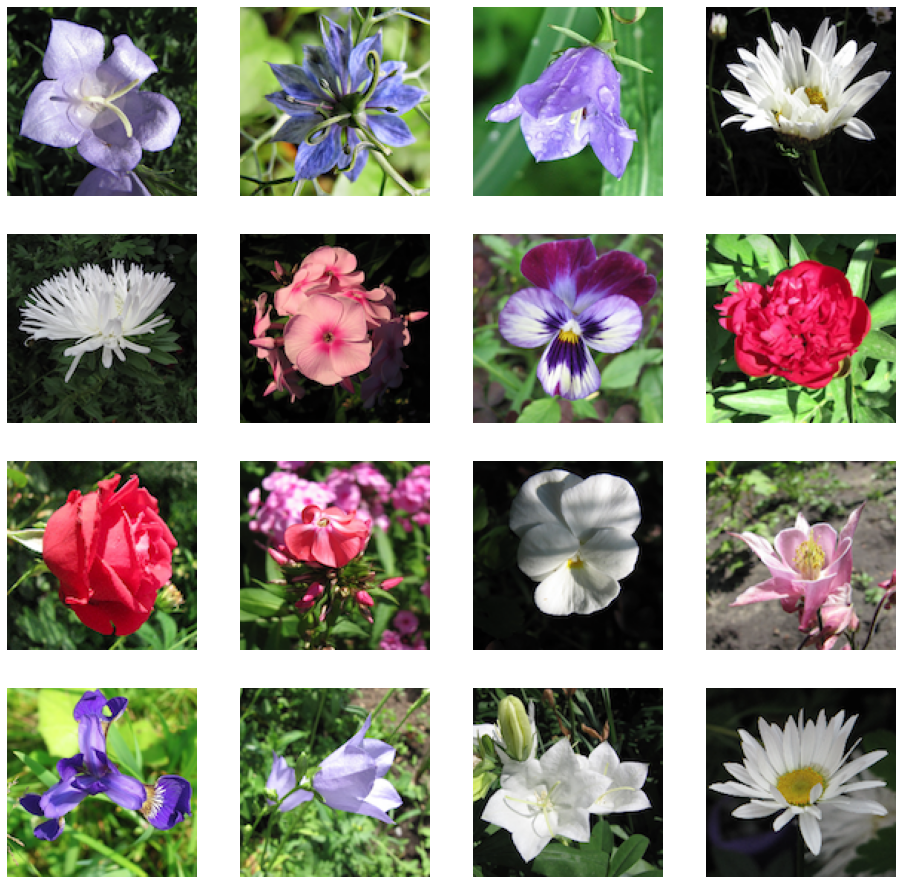

In [ ]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_flowers_pix = [os.path.join(train_flowers_dir, fname) 
                for fname in os.listdir(train_flowers_dir)[pic_index-8:pic_index]]
next_flower_images_pix = [os.path.join(train_flower_images_dir, fname) 
                for fname in os.listdir(train_flower_images_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_flowers_pix+next_flower_images_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import cv2
import numpy as np

# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)



In [ ]:
# Gather data validation
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)

Test Data =  (813, 150, 150, 3)
Test Label =  (813,)
Train Data =  (813, 150, 150, 3)
Train Label =  (813,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", test_data[0][0][0])

x_test = test_data.astype('float32') / 255.0
x_train = train_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data sebelum di-normalisasi  [ 63 107  83]
Data setelah di-normalisasi  [0.24705882 0.41960785 0.3254902 ]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", test_label[100:110])

lb = LabelEncoder()
y_test = lb.fit_transform(test_label)
y_train = lb.fit_transform(train_label)

print("Label setelah di-encoder ", y_test[100:110])

Label sebelum di-encoder  ['flower_images' 'flower_images' 'flower_images' 'flower_images'
 'flower_images' 'flower_images' 'flower_images' 'flower_images'
 'flower_images' 'flower_images']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(64, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

# Tampilkan model summary
model.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4320064   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,320,129
Trainable params: 4,320,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_test, y_test ))



Epoch 1/50
41/41 [==============================] - 2s 39ms/step - loss: 5.1272 - acc: 0.5966 - val_loss: 1.1324 - val_acc: 0.7294
Epoch 2/50
41/41 [==============================] - 1s 35ms/step - loss: 1.2417 - acc: 0.6482 - val_loss: 1.6116 - val_acc: 0.7417
Epoch 3/50
41/41 [==============================] - 1s 36ms/step - loss: 1.2209 - acc: 0.6740 - val_loss: 0.6501 - val_acc: 0.7442
Epoch 4/50
41/41 [==============================] - 1s 35ms/step - loss: 1.0759 - acc: 0.6839 - val_loss: 0.7219 - val_acc: 0.7442
Epoch 5/50
41/41 [==============================] - 1s 35ms/step - loss: 1.2793 - acc: 0.6704 - val_loss: 2.0952 - val_acc: 0.7417
Epoch 6/50
41/41 [==============================] - 1s 34ms/step - loss: 1.3213 - acc: 0.6839 - val_loss: 0.6010 - val_acc: 0.7294
Epoch 7/50
41/41 [==============================] - 1s 34ms/step - loss: 1.1213 - acc: 0.6790 - val_loss: 0.5422 - val_acc: 0.7392
Epoch 8/50
41/41 [==============================] - 1s 35ms/step - loss: 1.3651 - a

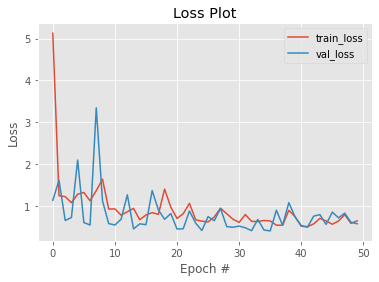

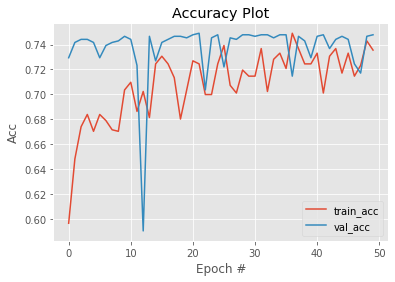

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))

              precision    recall  f1-score   support

           0       0.73      0.04      0.07       210
           1       0.75      1.00      0.85       603

    accuracy                           0.75       813
   macro avg       0.74      0.52      0.46       813
weighted avg       0.74      0.75      0.65       813

